# Tarefa 01 - Grupo 03
1. Disciplina: Data Analytics Hands-on
2. Integrantes:

*   Leandro Ariel Caputo
*   Matheus Oliveira
*   Loyanne Cristina Lemos Rabelo
*   Victor Miranda Bulhosa


##APRESENTAÇÃO DOS DADOS E OBJETIVO DO TRABALHO

Link para a base de dados: https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data

Help Internacional: agrupandos os países através de aprendizado não supervisionado.

---


A ONG HELP International conseguiu arrecadar $ 10 milhões. Agora o CEO necessita decidir como utilizar esta quantia de forma estratégica e eficiente. A escolha deve ser tomada com base nos países que estejam em pior situação. Dessa forma, o trabalho da equipe de Ciência de Dados é categorizar os países utilizando alguns indicadores socioeconômicos e de saúde que determinam o nível geral de desenvolvimento de cada país, e então sugerir os países nos quais o CEO deve focar.

##Importação das Bibliotecas Utilizadas no Notebook

In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.precision", 2)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import LabelBinarizer
# import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split #função para fazer hold-out
from sklearn.model_selection import cross_val_score #função para fazer cross-validation
from sklearn.model_selection import GridSearchCV #função para encontrar melhores parâmetros de algoritmo de classificação
from sklearn.metrics import classification_report # metricas de validação
from sklearn.neighbors import KNeighborsClassifier #função para algoritmo KNN
from sklearn.linear_model import LogisticRegression
from sklearn import tree #função para algoritmo Árvore de Decisão
from sklearn.ensemble import RandomForestClassifier #função para algoritmo Random Forest
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

## ANÁLISE EXPLORATÓRIA DOS DADOS

In [ ]:
df = pd.read_csv('Country-data.csv',sep=",",encoding = "ISO-8859-1")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Conforme verificado acima não há nenhum dado faltante na base de dados. Os atributos são:

* country: nome do país.

* child_mort: mortalidade de crianças abaixo de 5 anos de idade a cada mil nascidos vivos.

* exports: exportação de bens e serviços per capita. Dado como % do PIB per capita.

* health: total de gastos com saúde per capita. Dado como % do PIB per capita.

* imports: importação de bens e serviços per capita. Dado como % do PIB per capita.

* income: renda líquida por pessoa.

* inflation: a medida da taxa de crescimento anual do PIB total.

* life_expec: a média de anos que um recém-nascido viveria mantidos os padrões atuais de mortalidade.

* total_fer: o número de crianças  que nasceriam de cada mulher mantidas as atuais taxas de idade/fertilidade.

* gdpp: PIB per capita. Calculado como o PIB Total dividido pela população total.

In [ ]:
#Modificando o nome dos atributos:
df.columns=['pais', 'mort_infantil', 'exportacoes', 'gasto_saude', 'importacoes', 'renda', 'inflacao',
       'expectativa_vida', 'fertilidade', 'pib_per_capita']

#Conversão dos Tipos de Atributos
df_EDA = df.copy()
numericos = ['mort_infantil', 'exportacoes', 'gasto_saude', 'importacoes', 'renda', 'inflacao','expectativa_vida', 'fertilidade', 'pib_per_capita']

In [ ]:
df_EDA.head()

,pais,mort_infantil,exportacoes,gasto_saude,importacoes,renda,inflacao,expectativa_vida,fertilidade,pib_per_capita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Análise Univariada

#### Atributos Numéricos

Na análise univariada dos atributos numéricos será verificada a distribuição desses dados através de medidas de tendência central e dispersão e gráficos como histogramas e boxplots.

In [ ]:
df_EDA[numericos].describe()

,mort_infantil,exportacoes,gasto_saude,importacoes,renda,inflacao,expectativa_vida,fertilidade,pib_per_capita
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,38.27,41.11,6.82,46.89,17144.69,7.78,70.56,2.95,12964.16
std,40.33,27.41,2.75,24.21,19278.07,10.57,8.89,1.51,18328.70
min,2.60,0.11,1.81,0.07,609.00,-4.21,32.10,1.15,231.00
25%,8.25,23.80,4.92,30.20,3355.00,1.81,65.30,1.79,1330.00
50%,19.30,35.00,6.32,43.30,9960.00,5.39,73.10,2.41,4660.00
75%,62.10,51.35,8.60,58.75,22800.00,10.75,76.80,3.88,14050.00
max,208.00,200.00,17.90,174.00,125000.00,104.00,82.80,7.49,105000.00


In [ ]:
print(f'Quantidade de registros com inflação menor que zero: {len(df_EDA[df_EDA.inflacao<0])}')

Quantidade de registros com inflação menor que zero: 8


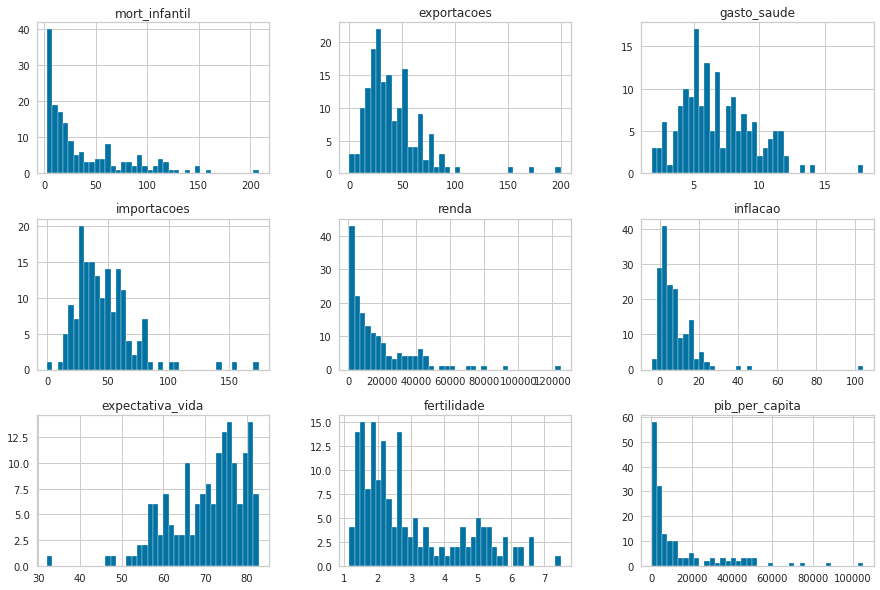

In [ ]:
df_EDA[numericos].hist(figsize=(15, 10), bins=40);

A maioria das distribuições possuem cauda à esquerda ou à direit, e não há
distribuição normal aparente.

In [ ]:
# Teste de normalidade - Shapiro
for x in numericos:
    pvalor = stats.shapiro(df_EDA[x])[1]
    if (pvalor > 0.05):
        print(f'{x} segue distribuição normal, pois o p-valor igual a {pvalor:.2e}')
    else:
        print(f'{x} não segue distribuição normal, pois o p-valor igual a {pvalor:.2e}')

mort_infantil não segue distribuição normal, pois o p-valor igual a 2.17e-13
exportacoes não segue distribuição normal, pois o p-valor igual a 2.55e-13
gasto_saude não segue distribuição normal, pois o p-valor igual a 2.63e-04
importacoes não segue distribuição normal, pois o p-valor igual a 6.64e-11
renda não segue distribuição normal, pois o p-valor igual a 7.28e-15
inflacao não segue distribuição normal, pois o p-valor igual a 3.64e-19
expectativa_vida não segue distribuição normal, pois o p-valor igual a 1.64e-07
fertilidade não segue distribuição normal, pois o p-valor igual a 9.83e-11
pib_per_capita não segue distribuição normal, pois o p-valor igual a 3.83e-17


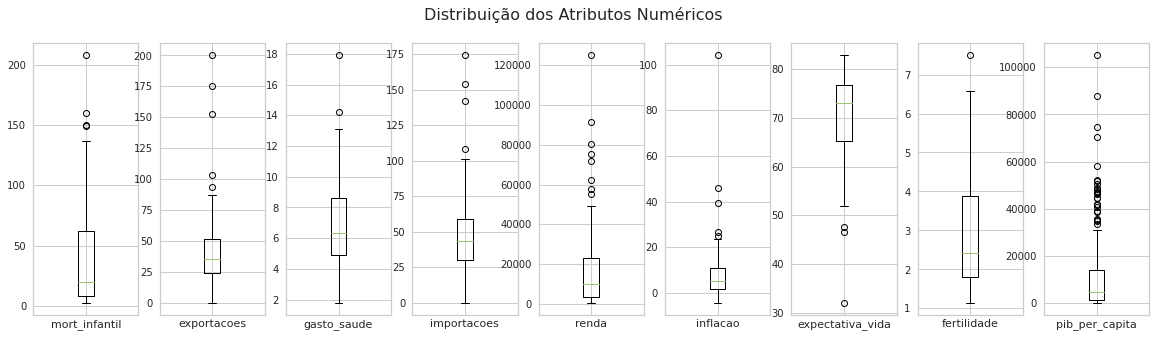

In [ ]:
fig,ax = plt.subplots(1,len(numericos),figsize = (20,5))

for i,val in enumerate(numericos):
  ax[i].boxplot(df_EDA[val])
  ax[i].set_xlabel(val)
  ax[i].tick_params(axis='x',which='both', bottom=False,top=False,labelbottom=False)

fig.suptitle('Distribuição dos Atributos Numéricos', fontsize=16);

Há presença de possíveis outliers em todos atributos, com destaque para o atributo pib_per_capita.

### Análise Multivariada

#### Atributos Numéricos x Numéricos

Será checada a dependência entre os atributos numéricos através da matriz de correlação. Como o atributo alvo é categórico, está análise verificará apenas se existe correlação entre os preditores.

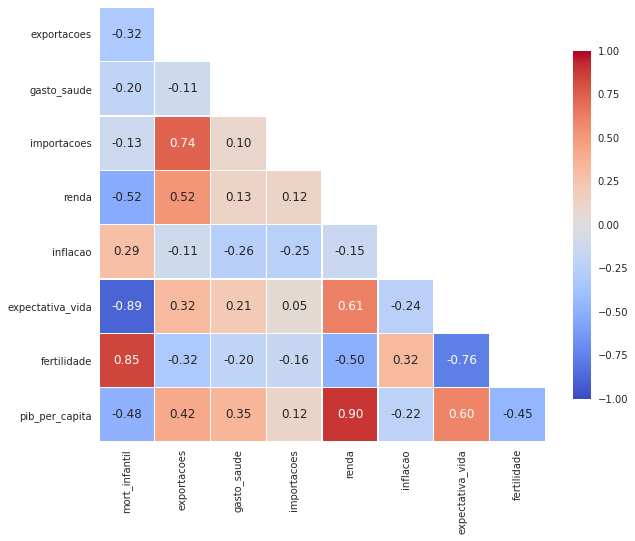

In [ ]:
#MATRIZ DE CORRELAÇÃO

df_corr = df_EDA[numericos].corr()
fig, ax = plt.subplots(figsize=(10, 8))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8},linewidths=.5)
# yticks
plt.yticks(rotation=0)
plt.show()

In [ ]:
# Copiei essa função para colocar o coeficiente nos gráficos
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

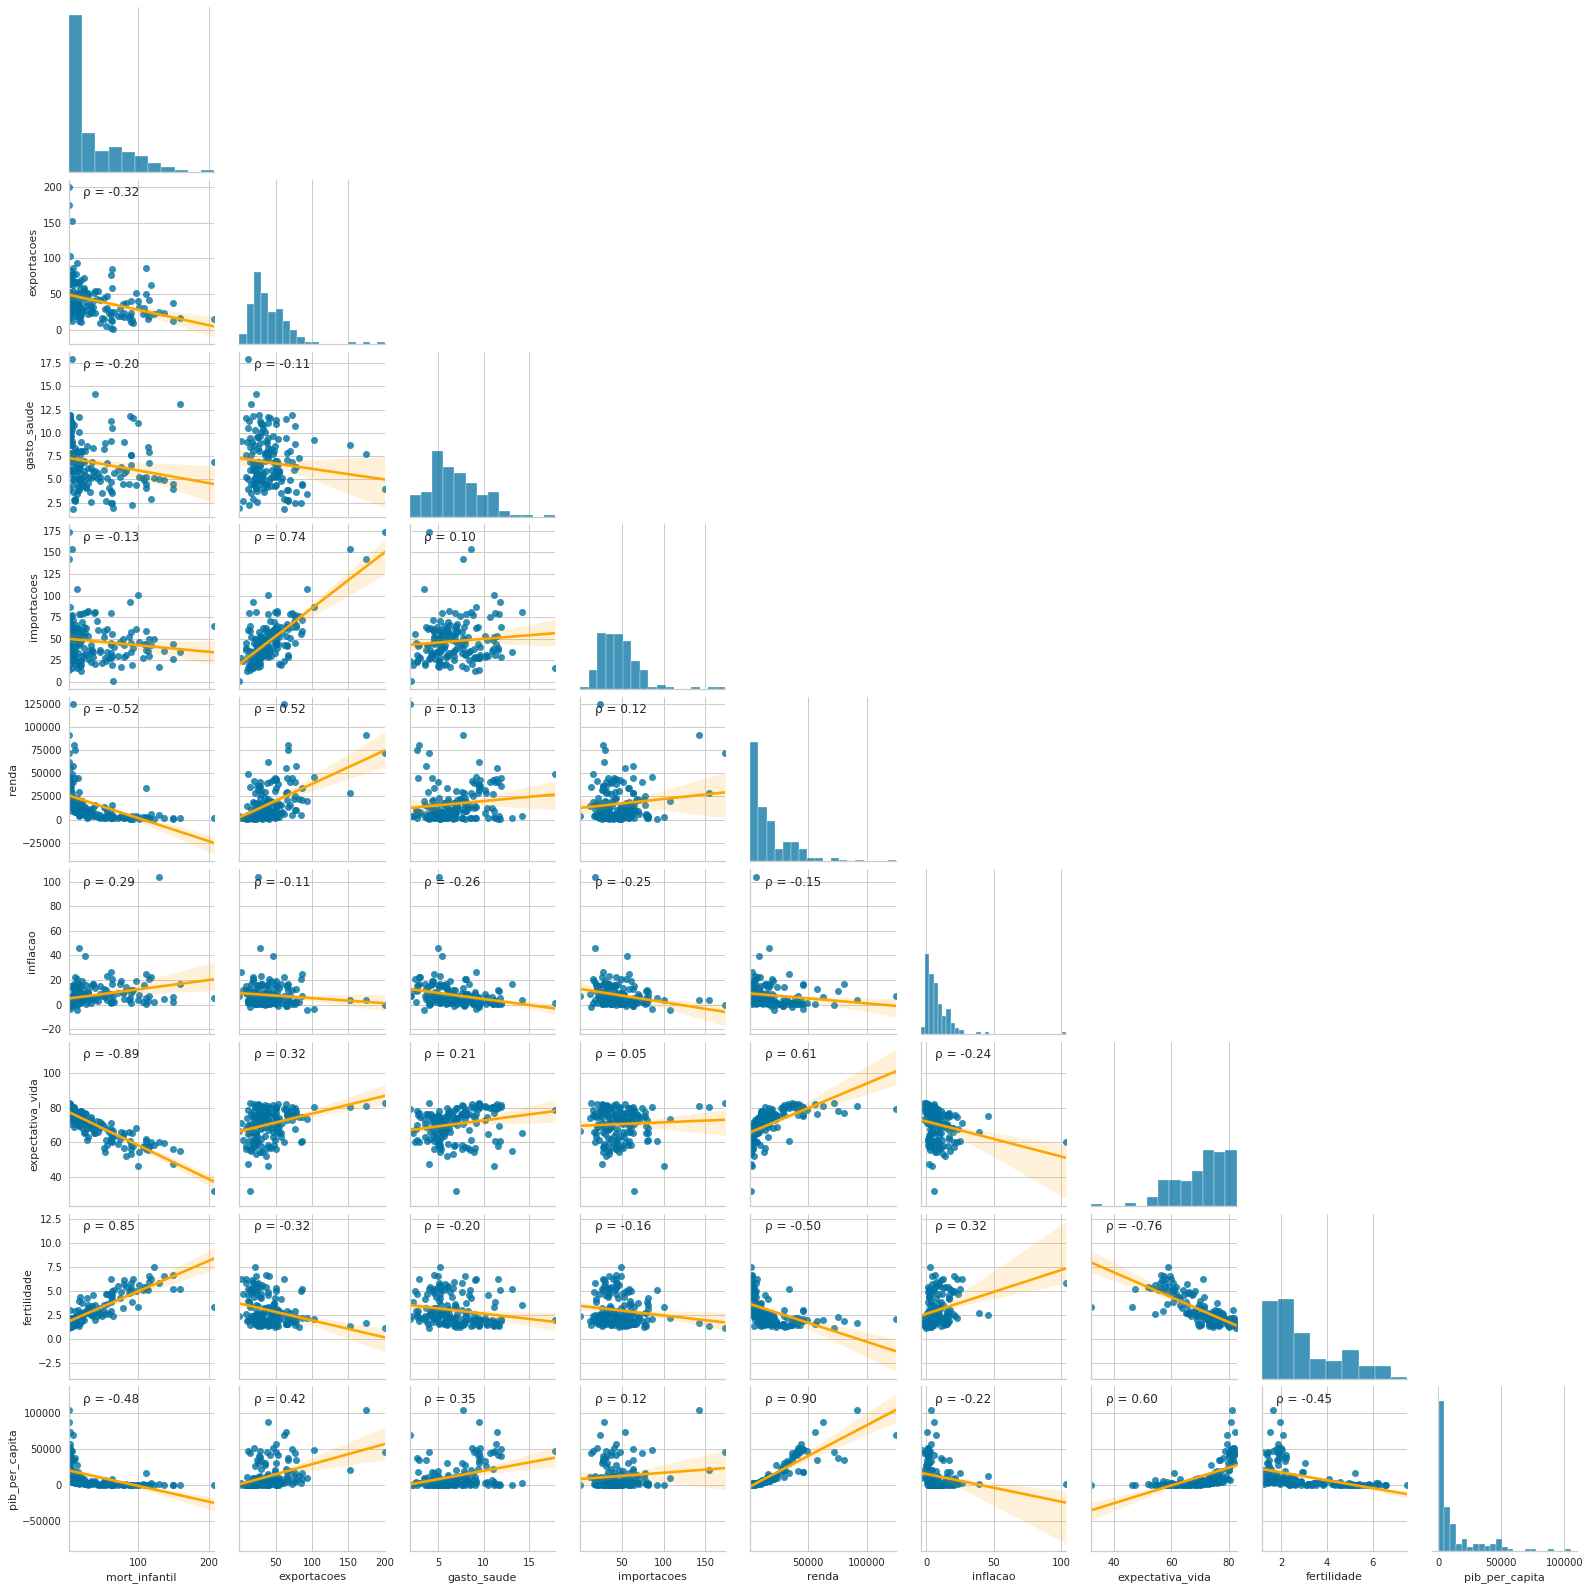

In [ ]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df_EDA[numericos], kind = "reg", corner = True, plot_kws={'line_kws':{'color':'orange'}}).map_lower(corrfunc);

Os atributos com módulo do coeficiente de Pearson maior que 0,7 apresentam correlação forte, tais como fertilidade, mort_infantil e expectativa_vida, dentre outros.

Já os atributos importacoes e exportacoes apresentam coeficiente com valor elevado, porém é possível perceber através do gráfico de dispersão que não há linearidade aparente entre os atributos, sendo a causa do valor elevado a presença de possíveis outliers.

Para cada variável X na matriz de correlação, foi plotada no eixo Y a variável com maior correlação, desde que o r > 0.5, nos gráficos a seguir. Em caso de mais de uma variável com r > 0.5, ela fica mapeada no tamanho do marcador.

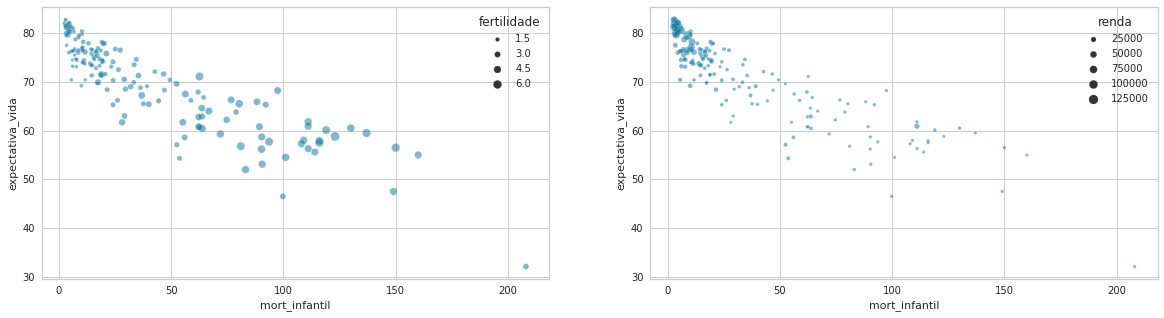

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(20,5))

sns.scatterplot(x='mort_infantil', y='expectativa_vida',
                size='fertilidade',sizes=(10,80),alpha=0.5,
                data=df_EDA, ax = ax[0]);

sns.scatterplot(x='mort_infantil', y='expectativa_vida',
                size='renda',sizes=(10,80),alpha=0.5,
                data=df_EDA, ax=ax[1]);

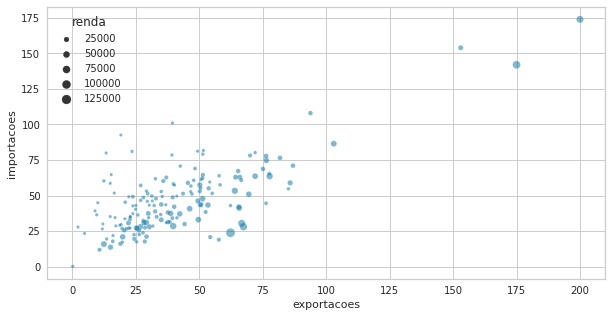

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,5))

sns.scatterplot(x='exportacoes', y='importacoes',
                size='renda',sizes=(10,80),alpha=0.5,
                data=df_EDA);

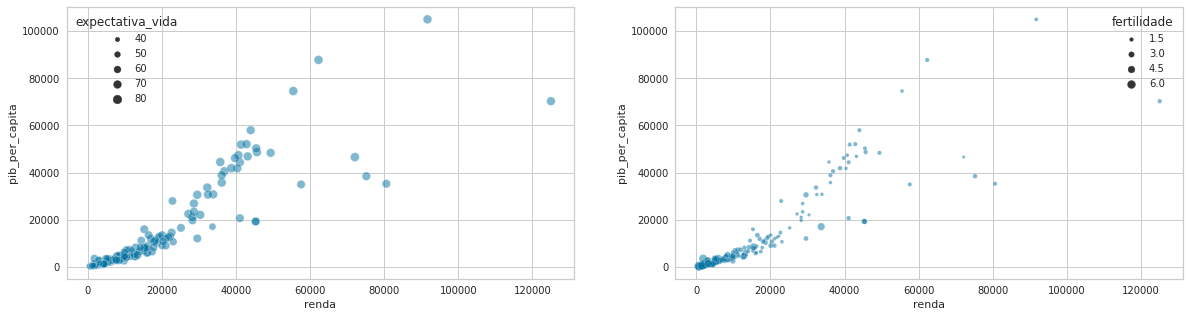

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(20,5))

sns.scatterplot(x='renda', y='pib_per_capita',
                size='expectativa_vida',sizes=(10,80),alpha=0.5,
                data=df_EDA, ax = ax[0]);

sns.scatterplot(x='renda', y='pib_per_capita',
                size='fertilidade',sizes=(10,80),alpha=0.5,
                data=df_EDA, ax=ax[1]);

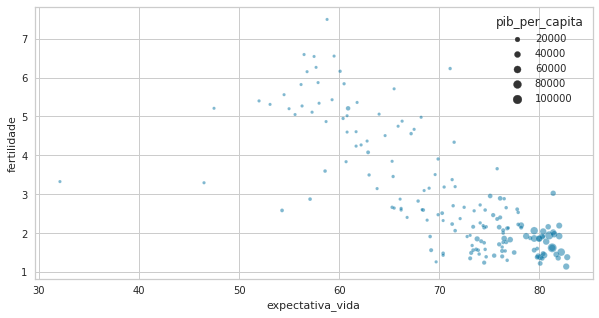

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,5))

sns.scatterplot(x='expectativa_vida', y='fertilidade',
                size='pib_per_capita',sizes=(10,80),alpha=0.5,
                data=df_EDA);

## PRÉ-PROCESSAMENTO DOS DADOS

Abaixo são aplicados os algorítmos Powertransformer e MinMaxScaler para normalização e escalonamento dos dados a fim de tornar-los mais adequados ao processamento pelos algorítmos de agrupamento.

In [ ]:
df_pp = df.copy()

In [ ]:
# Tentativa de criar atributo novo, porém piorou os resultados.

# # Fonte -> https://www.dicionariofinanceiro.com/idh/
# import math
# def indice(EV,Renda):
#     Vi = (EV-20)/(85-20)
#     Ri = (math.log(Renda)-math.log(100))/(math.log(75000)-math.log(100))
#     indice = math.sqrt(Vi*Ri)
#     return indice
# df_pp['indice'] = df.apply(lambda x: indice(x["expectativa_vida"],x["pib_per_capita"]),axis=1)

In [ ]:
# Dropar esses atributos melhora os resultados, pois nos boxplots por cluster percebemos que as distribuições eram parecidas, ou seja, esses atributos
# não auxiliaram na separação dos grupos, por conta de sobreposição.
df_pp.drop(['exportacoes', 'importacoes','gasto_saude','inflacao','renda'], axis = 1, inplace = True)

In [ ]:
numericos = ['mort_infantil', 'expectativa_vida', 'fertilidade', 'pib_per_capita']

In [ ]:
#NORMALIZAÇÃO COM POWERTRANSFORMER
pt = PowerTransformer()
df_pp[numericos] = pt.fit_transform(df_pp[numericos])

#ESCALONAMENTO COM MINMAXSCALER
scaler = MinMaxScaler()
df_pp[numericos] = scaler.fit_transform(df_pp[numericos])

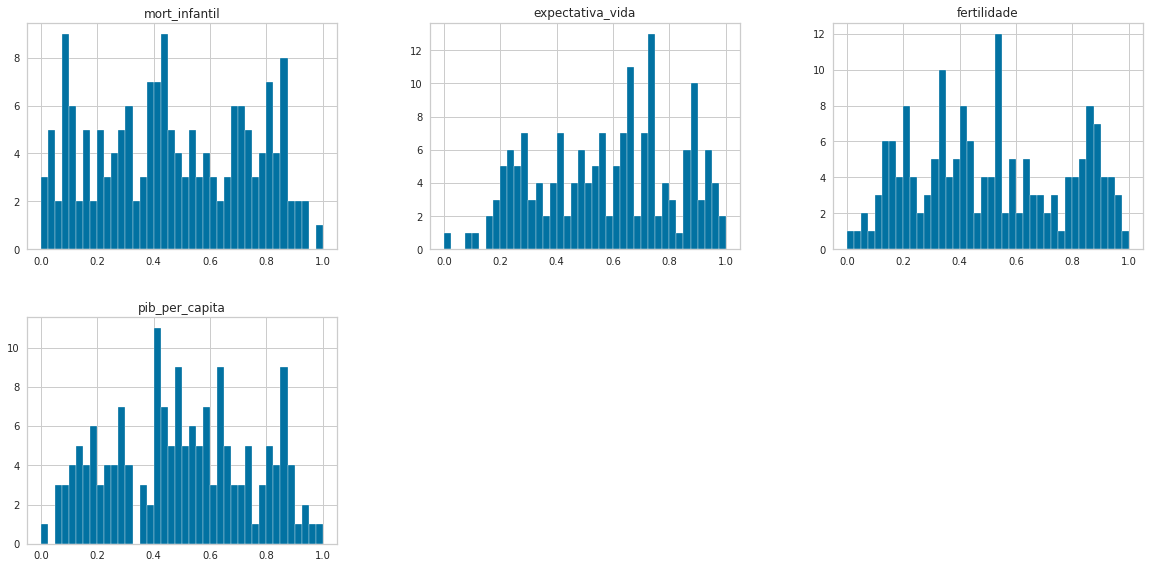

In [ ]:
df_pp[numericos].hist(figsize=(20, 15), bins=40, layout=(3, 3));

É possível verificar a distribuição dos atributos normalizados com os histogramas acima. Percebe-se que todos os atributos estão entre 0 e 1, necessário para aplicação das técnicas de agrupamento.

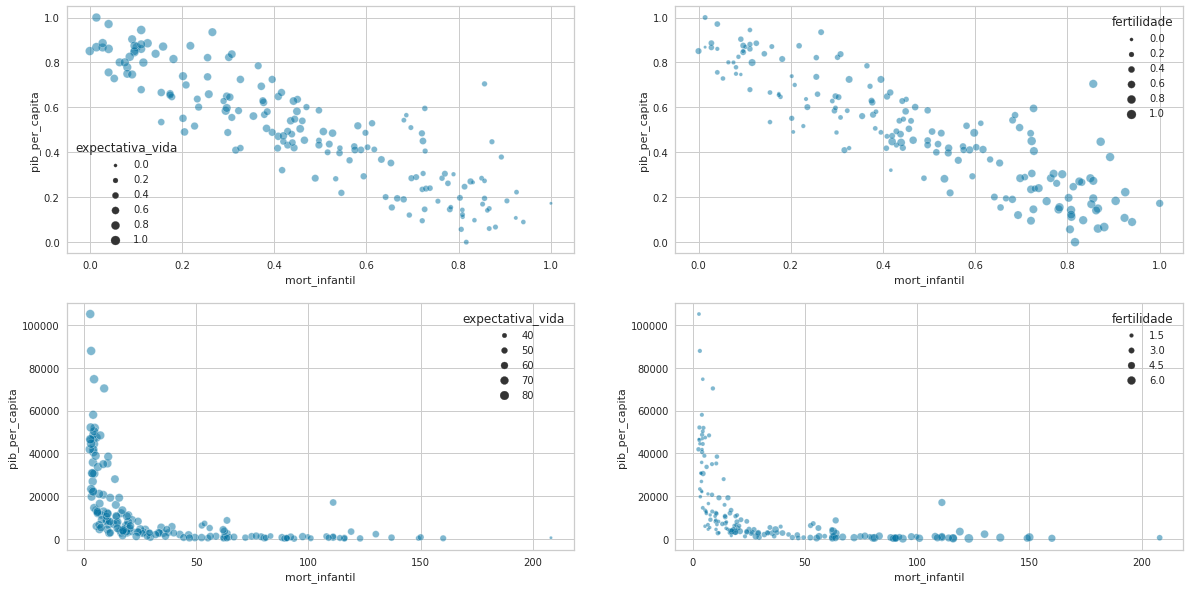

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(20,10))

#COM NORMALIZAÇÃO E ESCALONAMENTO
sns.scatterplot(x='mort_infantil', y='pib_per_capita',
                size='expectativa_vida',sizes=(10,80),alpha=0.5,
                data=df_pp, ax = ax[0,0]);

sns.scatterplot(x='mort_infantil', y='pib_per_capita',
                size='fertilidade',sizes=(10,80),alpha=0.5,
                data=df_pp, ax=ax[0,1]);

#SEM NORMALIZAÇÃO E ESCALONAMENTO
sns.scatterplot(x='mort_infantil', y='pib_per_capita',
                size='expectativa_vida',sizes=(10,80),alpha=0.5,
                data=df_EDA, ax = ax[1,0]);

sns.scatterplot(x='mort_infantil', y='pib_per_capita',
                size='fertilidade',sizes=(10,80),alpha=0.5,
                data=df_EDA, ax=ax[1,1]);

Acima segue uma comparação dos gráficos de dispersão de alguns atributos da base de dados com e sem o efeito da normalização e escalonamento. Verifica-se que a normalização e escalonamento dos atributos contribui para deixar a relação entre os atributos mais linear.

Além disso, o escalonamento é fundamental para os algoritmos de agrupamento baseados na distância entre os pontos, como é o caso do K-Means, de modo que atributos com maior escala não tenham indevidamente um maior peso na determinação dos clusters.

In [ ]:
#REDUÇÃO DE DIMENSIONALIDADE (PCA)
pca = PCA(n_components=2)
numericos_pca = ['pc1', 'pc2']

pca.fit(df_pp[numericos])
df_pca = pd.DataFrame(data = pca.transform(df_pp[numericos])  , columns = numericos_pca)
df_pca["pais"] = df_pp["pais"].values

In [ ]:
# Verificar variância da base explicada pelo PCA
sum(pca.explained_variance_ratio_)

0.950191702797482

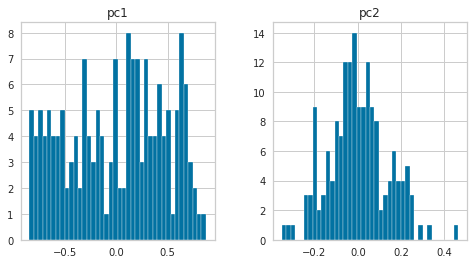

In [ ]:
df_pca.hist(figsize=(8,4), bins=40);

A utilização de 2 componentes no PCA foi o que trouxe melhores resultados, em relação a 3, 4 e 5 componentes. Com 2 componentes, foi possível representar aproximadamente 95% da variabilidade da base de dados utilizada.

## EXECUÇÃO DOS ALGORITMOS DE AGRUPAMENTO

In [ ]:
from sklearn.cluster import KMeans
X = df_pca[numericos_pca]
# X = df_pp[numericos]

### K-MEANS++

Rodar o método do cotovelo usando como métricas a inércia (distortion) e silhueta, a fim de nortear o número de clusters a ser utilizado. Como método de inicialização dos centróides será utilizado o K-Means++, por apresentar técnica de inicialização aleatória otimizada dos centróides, ao reduzir a possibilidade de sobreposição inicial dos mesmos.

In [ ]:
!pip install yellowbrick --upgrade

Requirement already up-to-date: yellowbrick in /usr/local/lib/python3.7/dist-packages (1.3.post1)


In [ ]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from yellowbrick.cluster import KElbowVisualizer

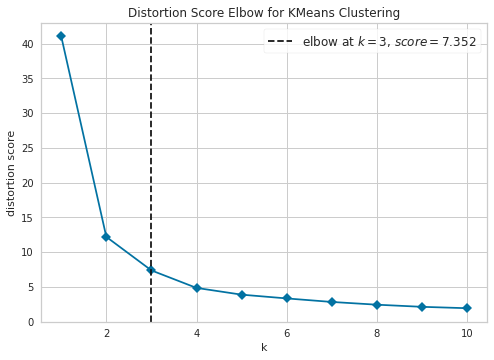

In [ ]:
#MÉTODO DO COTOVELO - MÉTRICA = DISTORTION = INÉRCIA

# Instantiate a scikit-learn K-Means model
model = KMeans(
    init='k-means++',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(1,11), metric='distortion', timings=False)

# Fit the data and visualize
visualizer.fit(X)
visualizer.poof()

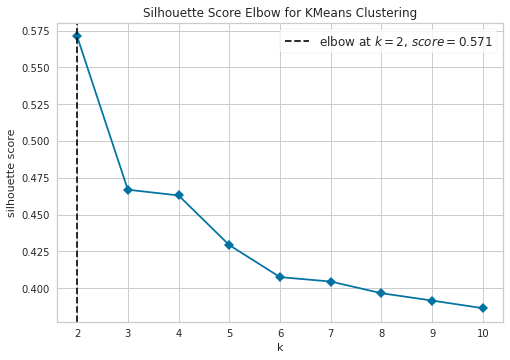

In [ ]:
#MÉTODO DO COTOVELO - MÉTRICA = SILHOUETTE

# Instantiate a scikit-learn K-Means model
model = KMeans(
    init='k-means++',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,11), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X)

visualizer.poof()

A métrica inércia indicou 3 clusters e a métrica silhueta indicou 2 clusters. Vamos utilizar 2 clusters pois essa quantidade apresentou melhores resultados no agrupamento.

In [ ]:
km = KMeans(
    n_clusters=2, init='k-means++',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

In [ ]:
df_EDA['Grupo_km'] = y_km
df_pp['Grupo_km'] = y_km
df_pca['Grupo_km'] = y_km
df_EDA.Grupo_km= df_EDA.Grupo_km.astype('category')
df_pp.Grupo_km= df_pp.Grupo_km.astype('category')
df_pca.Grupo_km= df_pca.Grupo_km.astype('category')

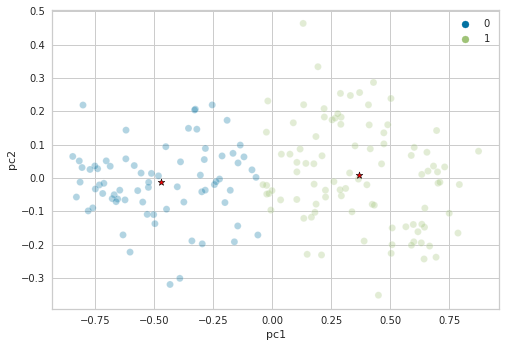

In [ ]:
sns.scatterplot('pc1','pc2',hue='Grupo_km',alpha=0.3,data=df_pca)
x = km.cluster_centers_[:,0]
y = km.cluster_centers_[:,1]
sns.scatterplot(x,y, marker='*',color='red', edgecolor='black')

O gráfico de dispersão acima mostra que há maior variabilidade dos dados em relação ao PC1 do que ao PC2, sendo possível traçar linhas verticais para separar os clusters.

In [ ]:
# Verificar peso dos atributos nos componentes do PCA.
pd.DataFrame(pca.components_,columns=df_pp.columns[1:len(df_pp.columns)-1],index=df_pca.columns[0:len(numericos_pca)])

,mort_infantil,expectativa_vida,fertilidade,pib_per_capita
pc1,-0.55,0.48,-0.50,0.47
pc2,0.02,-0.26,-0.79,-0.55


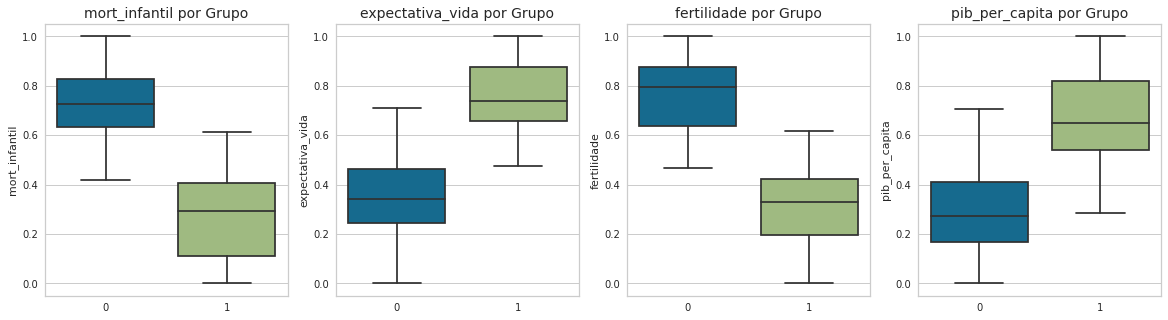

In [ ]:
fig,ax = plt.subplots(1,4,figsize = (20,5),sharex=True)

for i,atrib in enumerate(numericos):
  sns.boxplot(x='Grupo_km', y=atrib,data=df_pp,ax=ax[i])
  ax[i].set_title(str(atrib)+' por Grupo', fontsize=14);
  ax[i].set_xlabel('');

Na rodada de baseline, considerando todos os atributos, foi verificado que os atributos "importacoes", "inflacao" e, em menor escala, os atributos "exportacoes" e "gasto_saude", possuiam distribuição parecida por cluster, o que dificultaria o agrupamento por conta de sobreposição dos valores. Portanto, esses atributos foram previamente descartados.

Analisando os outros atributos, "mort_infantil", "expectativa_vida", "fertilidade" e "pib_per_capita", é possível chegar a conclusão de que o grupo 0 é o que possui maior necessidade de ajuda. Serão escolhidos os países em pior condição pertencentes a essa grupo para receberem auxílio. Mais adiante, o critério de classificação quanto a condição será apresentado.

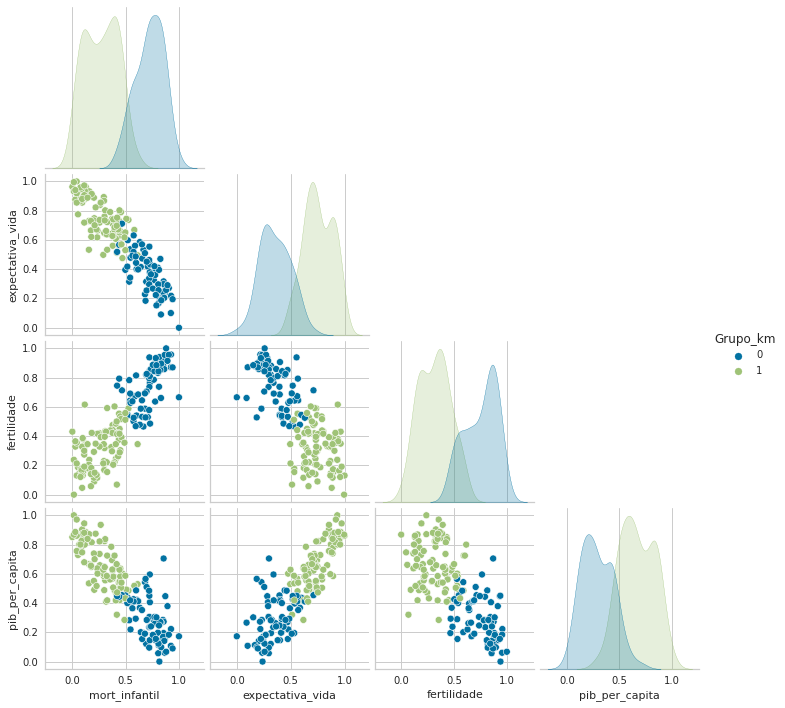

In [ ]:
#variables = ['mort_infantil', 'fertilidade', 'indice']
variables = ['mort_infantil', 'expectativa_vida', 'fertilidade', 'pib_per_capita']
sns.pairplot(df_pp, hue="Grupo_km",corner=True, vars = variables)

O gráfico acima traz uma visão entre as relações de alguns atributos numéricos e os grupos, bem como a sobreposição dos grupos (gráficos de densidade na diagonal).

In [ ]:
# Contar elementos por grupo
df_pp.Grupo_km.value_counts()

1    94
0    73
Name: Grupo_km, dtype: int64

In [ ]:
# Grupo mais necessitado foi o Grupo 0
df_EDA[df_EDA.Grupo_km==0]

,pais,mort_infantil,exportacoes,gasto_saude,importacoes,renda,inflacao,expectativa_vida,fertilidade,pib_per_capita,fert_cat,mort_cat,Grupo_km,Grupo_hier
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,alta,medio,0,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,alta,medio,0,1
12,Bangladesh,49.4,16.0,3.52,21.8,2440,7.14,70.4,2.33,758,media,baixo,0,1
17,Benin,111.0,23.8,4.10,37.2,1820,0.89,61.8,5.36,758,alta,medio,0,1
18,Bhutan,42.7,42.5,5.20,70.7,6420,5.99,72.1,2.38,2180,media,baixo,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Uganda,81.0,17.1,9.01,28.6,1540,10.60,56.8,6.15,595,alta,medio,0,1
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,media,muito baixo,0,1
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,media,muito baixo,0,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,alta,baixo,0,1


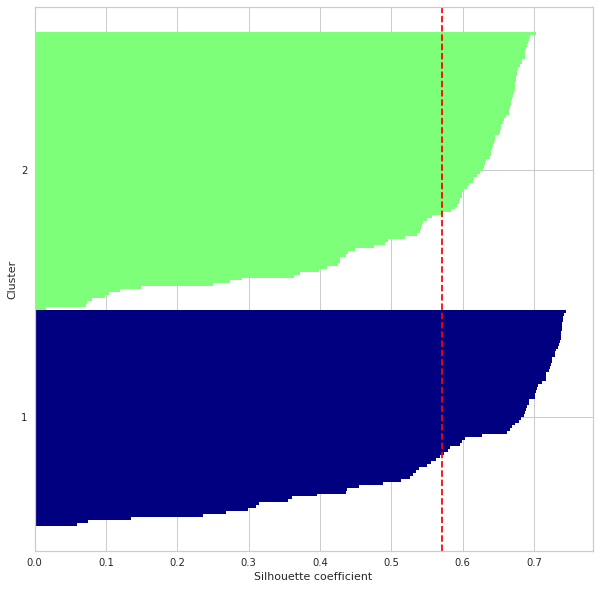

In [ ]:
# find cluster labels and number of clusters
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

# calculate silhouettes
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

# plot silhouette
plt.figure(figsize=(10, 10))
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(
        range(y_ax_lower, y_ax_upper),
        c_silhouette_vals,
        height=1.0, edgecolor='none',
        color=color
     )
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

# calculate silhouette score
silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

Conforme pode ser observado no gráfico acima, a silhueta média dos clusters é aproximadamente 0,57; sendo o melhor resultado obtido através das modificações aplicadas na etapa de pré-processamento. O ideal é aproximar ao máximo esse valor de 1.

### Hierarchical Clustering

A segunda técnica de agrupamento aplicada será a Hierarchical Clustering, onde não se faz necessário especificar a quantidade de grupos (embora seja possível escolher o valor de clusters).

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

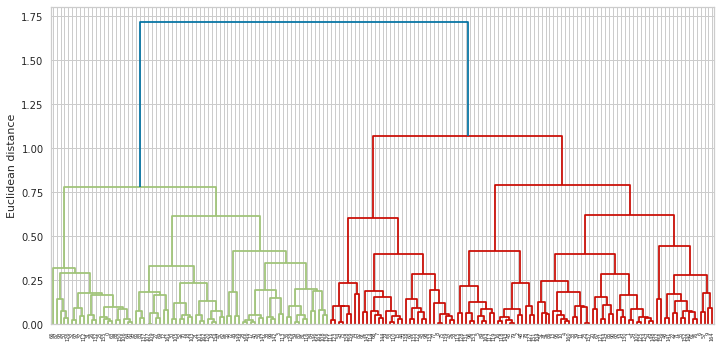

In [ ]:
row_clusters = linkage(X, method='complete', metric='euclidean')
# plot dendrogram
plt.figure(figsize=(10, 5))
row_dendr = dendrogram(row_clusters)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

O gráfico de dendograma acima traz como sugestão o agrupamento em 2 grupos distintos. Apesar da sugestão, foram feitos testes com 3 grupos também (perceba que o grupo a direita, em vermelho, parece poder ser dividos em dois); contudo, a divisão em 2 grupos trouxe o melhor resultado para esta técnica.

In [ ]:
# cluster with k=2
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
y_hier = ac.fit_predict(X)

In [ ]:
df_EDA['Grupo_hier'] = y_hier
df_pp['Grupo_hier'] = y_hier
df_pca['Grupo_hier'] = y_hier
df_EDA.Grupo_hier= df_EDA.Grupo_hier.astype('category')
df_pp.Grupo_hier = df_pp.Grupo_hier.astype('category')
df_pca.Grupo_hier= df_pca.Grupo_hier.astype('category')

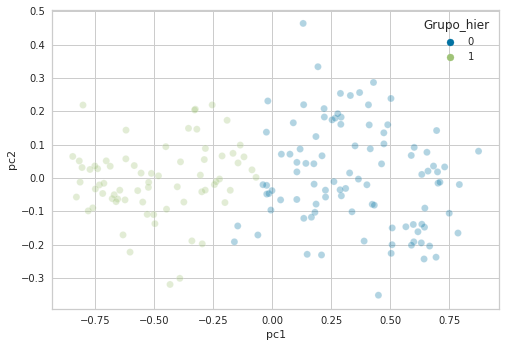

In [ ]:
sns.scatterplot('pc1','pc2',hue='Grupo_hier',alpha=0.3,data=df_pca)

O gráfico de dispersão acima mostra que há maior variabilidade dos dados em relação ao PC1 do que ao PC2, sendo possível traçar linhas verticais para separar os clusters.

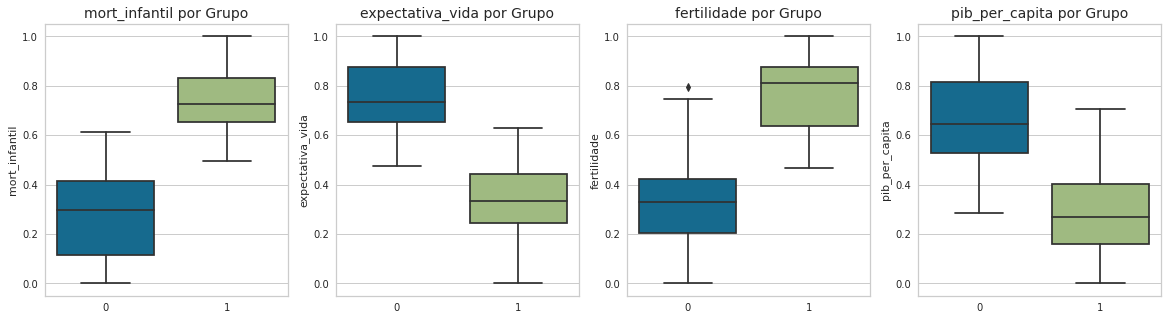

In [ ]:
fig,ax = plt.subplots(1,4,figsize = (20,5),sharex=True)

for i,atrib in enumerate(numericos):
  sns.boxplot(x='Grupo_hier', y=atrib,data=df_pp,ax=ax[i])
  ax[i].set_title(str(atrib)+' por Grupo', fontsize=14);
  ax[i].set_xlabel('');

Na rodada de baseline, considerando todos os atributos, foi verificado que os atributos "importacoes", "inflacao" e, em menor escala, os atributos "exportacoes" e "gasto_saude", possuiam distribuição parecida por cluster, o que dificultaria o agrupamento por conta de sobreposição dos valores. Portanto, esses atributos foram previamente descartados.

Analisando os outros atributos, "mort_infantil", "expectativa_vida", "fertilidade" e "pib_per_capita", é possível chegar a conclusão de que o grupo 1 é o que possui maior necessidade de ajuda. Serão escolhidos os países em pior condição pertencentes a essa grupo para receberem auxílio. Mais adiante, o critério de classificação quanto a condição será apresentado.

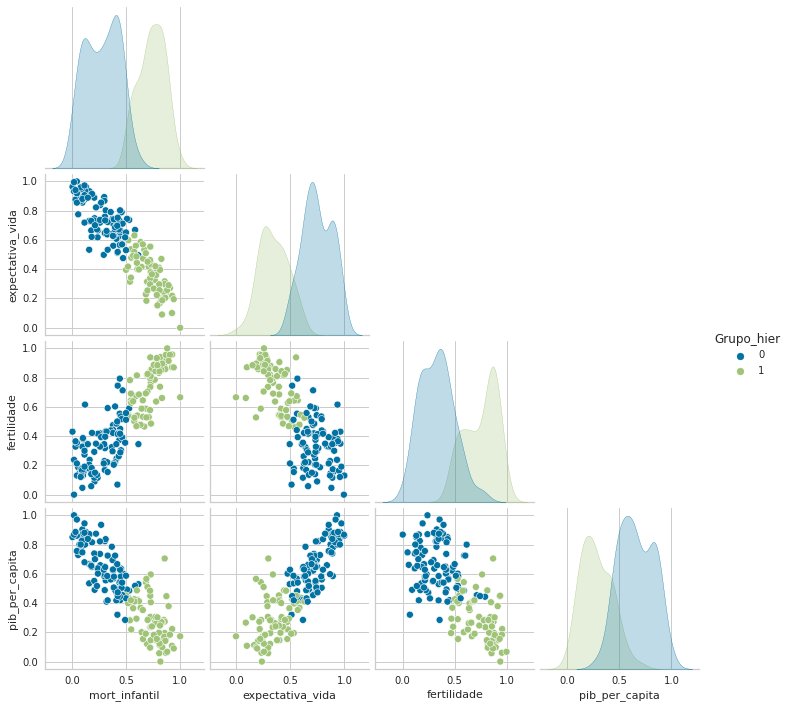

In [ ]:
variables = ['mort_infantil', 'expectativa_vida', 'fertilidade', 'pib_per_capita']
sns.pairplot(df_pp, hue="Grupo_hier",corner=True, vars = variables)

O gráfico acima traz uma visão entre as relações de alguns atributos numéricos e os grupos, bem como a sobreposição dos grupos (gráficos de densidade na diagonal). Aparentemente a sobreposição é maior, comparando com o KMeans.

In [ ]:
# Contar valores por grupo
df_pp.Grupo_hier.value_counts()

0    97
1    70
Name: Grupo_hier, dtype: int64

In [ ]:
# Grupo mais necessitado é o Grupo 1
df_EDA[df_EDA.Grupo_hier==1]

,pais,mort_infantil,exportacoes,gasto_saude,importacoes,renda,inflacao,expectativa_vida,fertilidade,pib_per_capita,fert_cat,mort_cat,Grupo_km,Grupo_hier
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,alta,medio,0,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,alta,medio,0,1
12,Bangladesh,49.4,16.0,3.52,21.8,2440,7.14,70.4,2.33,758,media,baixo,0,1
17,Benin,111.0,23.8,4.10,37.2,1820,0.89,61.8,5.36,758,alta,medio,0,1
18,Bhutan,42.7,42.5,5.20,70.7,6420,5.99,72.1,2.38,2180,media,baixo,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Uganda,81.0,17.1,9.01,28.6,1540,10.60,56.8,6.15,595,alta,medio,0,1
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,media,muito baixo,0,1
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,media,muito baixo,0,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,alta,baixo,0,1


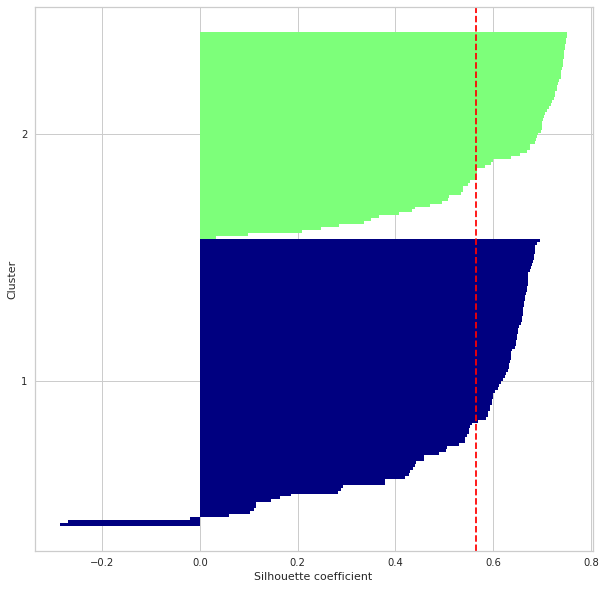

In [ ]:
# find cluster labels and number of clusters
cluster_labels = np.unique(y_hier)
n_clusters = cluster_labels.shape[0]

# calculate silhouettes
silhouette_vals = silhouette_samples(X, y_hier, metric='euclidean')

# plot silhouette
plt.figure(figsize=(10, 10))
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_hier == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(
        range(y_ax_lower, y_ax_upper),
        c_silhouette_vals,
        height=1.0, edgecolor='none',
        color=color
     )
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

# calculate silhouette score
silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

Conforme pode ser observado no gráfico acima, a silhueta média dos clusters é aproximadamente 0,57; sendo o melhor resultado obtido através das modificações aplicadas na etapa de pré-processamento. O ideal é aproximar ao máximo esse valor de 1.

Em comparação com o KMeans, é possível observar que há valores negativos de silhueta, o que indica que os pontos representados no cluster azul estão na realidade mais pertos do cluster verde. Portanto, optaremos por seguir com os resultados obtidos no KMeans.

## AVALIAÇÃO DO MODELO E CONSIDERAÇÕES FINAIS

Continuando com os resultados do KMeans, será atribuída uma classificação baseada em um critério de notas para avaliar quais países estão em pior situação dentro do Grupo 0.

As notas serão baseadas nos atributos "mort_infantil", "expectativa_vida", "fertilidade" e "pib_per_capita". Como esses atributos já estão normalizados, a nota será o produto desses valores; porém, já que os atributos de mortalidade infantil e fertilidade são valores que quanto maior, pior é a situação do país, será considerado o complemento da parcela, conforme fórmula abaixo:

Nota = (1 - mort_infantil) * (expectativa_vida) * (1 - fertilidade) * (pib_per_capita) * 1000

Os países com as menores notas serão selecionados. Ao todo serão escolhidos 5 países. A multiplicação por 1000 é por questão de escala, apenas.


In [ ]:
# Grupo mais necessitado foi o Grupo 0
df_pp['nota'] = (1 - df_pp["mort_infantil"]) + (df_pp["expectativa_vida"]) + (1 - df_pp["fertilidade"]) + (df_pp["pib_per_capita"])
df_pp[df_pp.Grupo_km == 0][["pais","nota"]].sort_values(by = "nota").head(5)

,pais,nota
31,Central African Republic,0.41
112,Niger,0.45
37,"Congo, Dem. Rep.",0.47
132,Sierra Leone,0.47
26,Burundi,0.48


Os 5 países classificados como mais necessitados são os exibidos acima. Podemos notar que os 5 países estão em território africano.